Соревнования из kaggel: **Students Performance in Exams**: предсказание, насколько хорошо сдадут экзамены студенты. 
https://www.kaggle.com/spscientist/students-performance-in-exams

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
%matplotlib inline

Загружаем данные 

In [3]:
data=pd.read_csv('C:/Games/Test/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Можно увидеть, что результаты экаменов представлены в 3ех параметрах: это math score, reading score и writing score.

* gender - пол
* race/ethnicity - к какой расе принадлежит
* parental level of education - уровень образования родителей
* lunch - обед (какой тип)
* test preparation course - пройден или нет подготовительный курс
* math score - оценки по математике
* reading score - оценки за чтение
* writing score - оценки за письменность 

Посмотрим типы каждой колонки:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
total score                    1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Добавим новое значение на основе имеющихся: Total Score или общее количество набранных баллов за все предметы

In [0]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']

Посмотрим средние значения по результатам:

In [5]:
print("Average math score is    : {}".format(np.mean(data['math score'])))
print("Average reading score is : {}".format(np.mean(data['reading score'])))
print("Average writing score is : {}".format(np.mean(data['writing score'])))
print("Average total score is   : {}".format(np.mean(data['total score'])/3))

Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.77066666666667


Посмотрим плотность распределения данных в таблице:

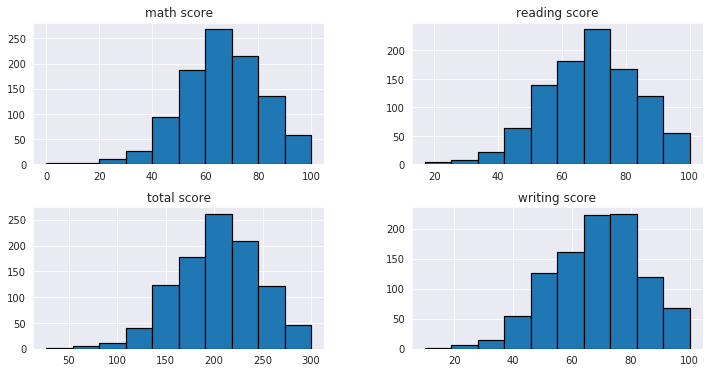

In [6]:
data.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

В основном, у всех значений получилось нормальное Гауссово распределение. 

Начертим violinplot.

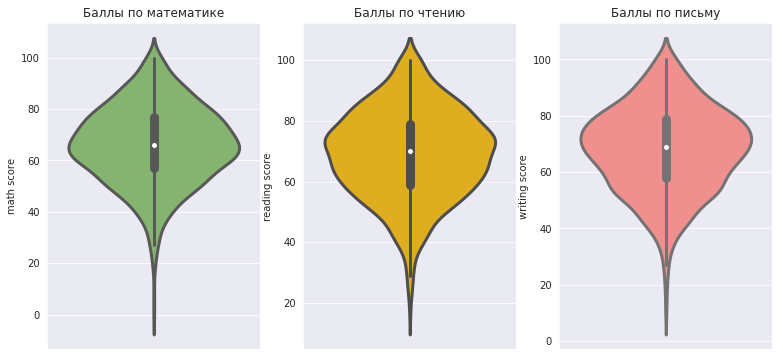

In [7]:
plt.figure(figsize = (13, 6))
plt.subplot(1, 3, 1)
plt.title('Баллы по математике')
sns.violinplot(y = 'math score', data = data,palette = 'summer', linewidth = 3)
plt.subplot(1, 3, 2)
plt.title('Баллы по чтению')
sns.violinplot(y = 'reading score', data = data, palette = 'Wistia_r', linewidth = 3)
plt.subplot(1, 3, 3)
plt.title('Баллы по письму')
sns.violinplot(y = 'writing score', data = data, palette = 'spring', linewidth = 3)
plt.show()

По графику можно увидеть, что значения по математике в основном находятся в интервале от 60 до 80, по чтению и письму от 50 до 80. 

Допустим, нам известно, проходные баллы по математике равны 40. Построим графики распределения тех, кто сдал и не сдал математику. 

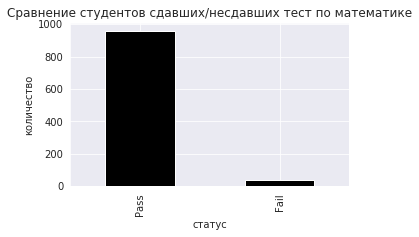

In [8]:
passmarks = 40

# создадим новую колонку
data['pass_math'] = np.where(data['math score'] < passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))

plt.title('Сравнение студентов сдавших/несдавших тест по математике')
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.show()

Построил pie график студентов, сдавшиъ/ не сдавших экзамен

[960, 40]


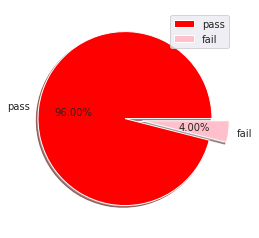

In [10]:

size = list(data['pass_math'].value_counts())
print(size)
colors = ['red', 'pink']
labels = "pass", "fail"
explode = [0, 0.2]

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.legend()
plt.show()

Посмотрим распределение тех, кто прошел **подготовительные курсы**, по полу.

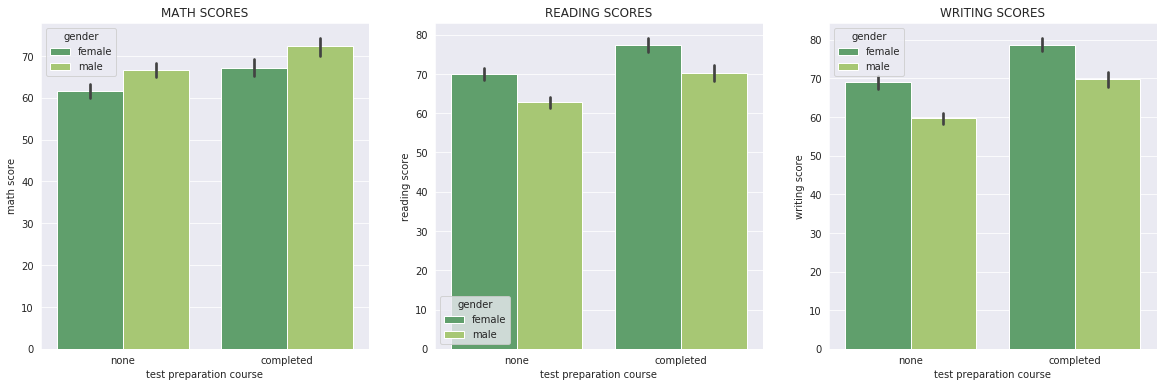

In [11]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 1)
sns.barplot(x = 'test preparation course', y = 'math score',data = data,hue = 'gender', palette = 'summer')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x = 'test preparation course', y = 'reading score',data = data, hue = 'gender', palette = 'summer')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x = 'test preparation course', y = 'writing score',data = data, hue = 'gender',palette = 'summer')
plt.title('WRITING SCORES')
plt.show()

Из графика выше мы можем сделать вывод, что по математике оценки у мужчин выше чем у женщин независимо от того, закончил человек подготовительный курс или нет. 
Из двух других графиков мы можем сделать вывод, что женщины в целом лучше сдают чтение и письмо. 
Из трех графиков можно сделать вывод, что если подготовительный курс был завершен, то человек получает оценки выше. 

Посмотрим как соотносятся данные по половому признаку

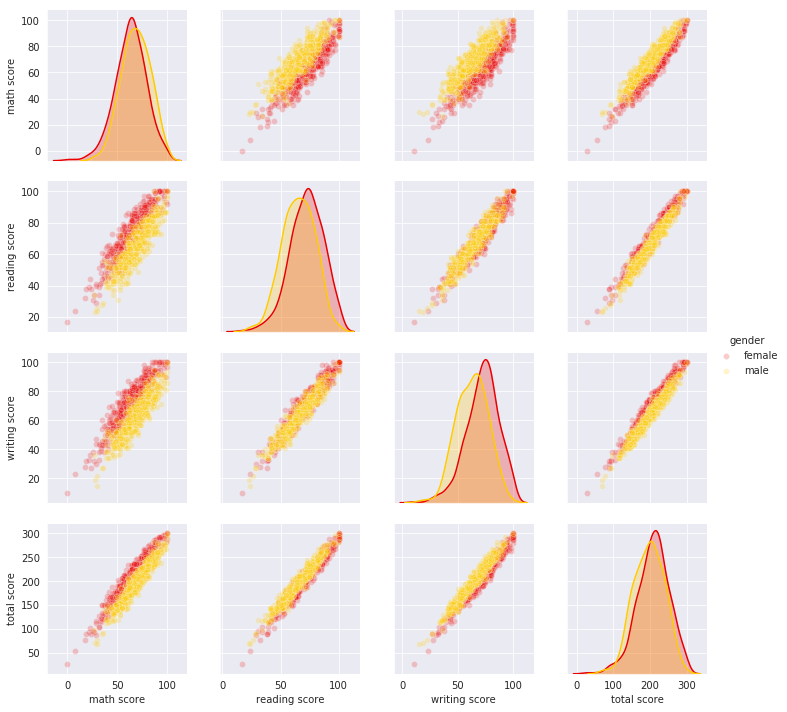

In [12]:
sns.pairplot(data = data, hue = 'gender', plot_kws = {'alpha': 0.2}, palette = 'hot')
plt.show()

Из графиков видно, что данные сильно коррелированы, классы хорошо отделяются по математике - чтению, математике - письму. 

Посмотрим что из себя представляет столбик **lunch**

In [13]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Посмотрим, как обед влияет на баллы

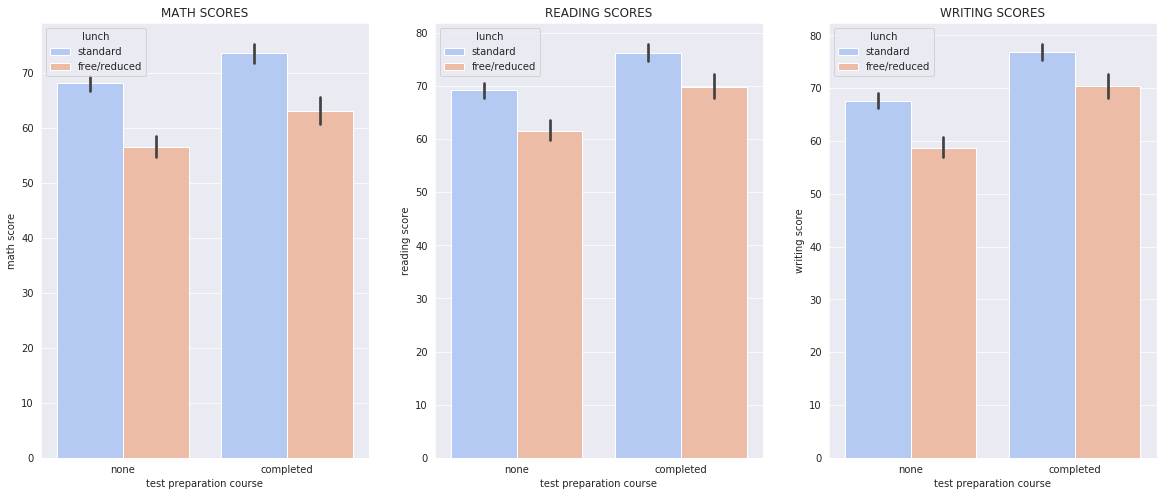

In [14]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 3, 1)
sns.barplot(x = 'test preparation course', y ='math score', data = data, hue = 'lunch', palette = 'coolwarm')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x = 'test preparation course', y = 'reading score', data = data, hue = 'lunch', palette = 'coolwarm')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x = 'test preparation course', y = 'writing score', data = data, hue = 'lunch', palette = 'coolwarm')
plt.title('WRITING SCORES')
plt.show()

В общем и целом, в обоих классах людей, употребляющих стандартный ланч, оценки лучше. 

Посмотрим на людей, получивших максимальное количество баллов:

In [15]:
data[(data['math score'] > 90) & (data['reading score'] > 90) & (data['writing score']>90)]\
.sort_values(by = ['total score'], ascending = False).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math
962,female,group E,associate's degree,standard,none,100,100,100,300,Pass
458,female,group E,bachelor's degree,standard,none,100,100,100,300,Pass
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,Pass
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,Pass
179,female,group D,some high school,standard,completed,97,100,100,297,Pass


Первый двое топовых студенты либо гении, либо приготовили шпаргалки, так как их подготовительные курсы не были завершены. 

Посмотрим распределение оценок по национальности. 

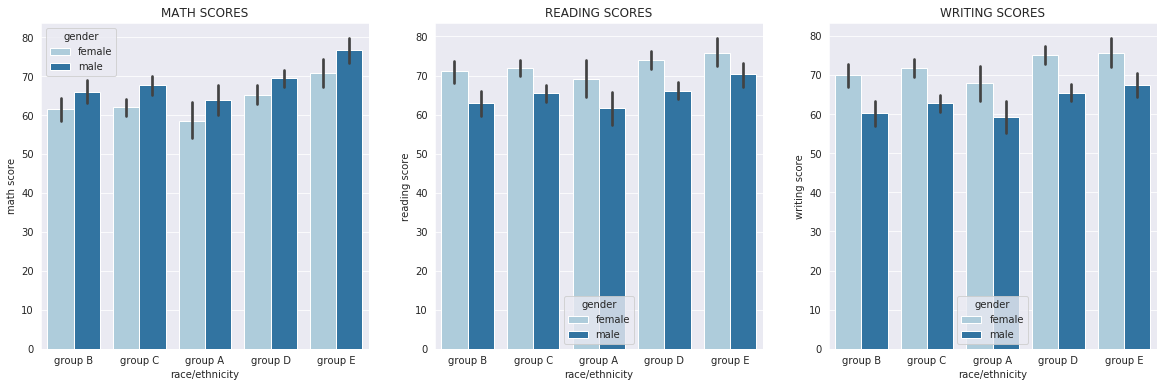

In [16]:
plt.figure(figsize = (20,6))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x = 'race/ethnicity', y ='math score', data = data, hue = 'gender', palette = 'Paired')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x = 'race/ethnicity', y = 'reading score', data = data, hue = 'gender', palette ='Paired')
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x = 'race/ethnicity',y = 'writing score', data = data, hue = 'gender',palette = 'Paired')
plt.show()

Группа Е имеет самые высокие показатели (больше всего людей в этой группе), причем больше сдавших по всем предметам. 

Посмотрим распределение образования родителей 

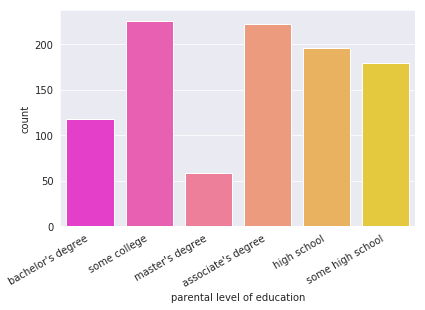

In [17]:
fig,ax = plt.subplots()
sns.countplot(x = 'parental level of education', data = data, palette = 'spring')
plt.tight_layout()
fig.autofmt_xdate()

Можно заметить, что в основном родители получили associate's degree или some college, очень мало имеют магистерское образование. 

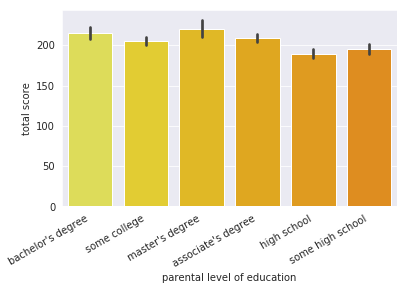

In [18]:
fig,ax = plt.subplots()
sns.barplot(x = data['parental level of education'], y = 'total score', data = data, palette = 'Wistia')
fig.autofmt_xdate()

 Можно заметить, что есть студенты, чьи родители получили степень магистра, имеют успеваемость выше, чем остальные. 

Построим модель линейной регрессии на основе данного датасета. Таргет значение - total score.

In [19]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass
1,female,group C,some college,standard,completed,69,90,88,247,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass
4,male,group C,some college,standard,none,76,78,75,229,Pass


Добавим класс 'sex' на основе 'gender' значеий.

In [21]:
data['sex'] = data['gender']
data.loc[data['gender'] == 'female', 'sex'] = 0
data.loc[data['gender'] == 'male', 'sex'] = 1
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,sex
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,0
1,female,group C,some college,standard,completed,69,90,88,247,Pass,0
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1
4,male,group C,some college,standard,none,76,78,75,229,Pass,1


Добавим колонку 'race' на основе колонки 'race/ethnicity'

In [22]:
data['race'] = data['race/ethnicity']
data.loc[data['race/ethnicity'] == 'group A', 'race'] = 0
data.loc[data['race/ethnicity'] == 'group B', 'race'] = 1
data.loc[data['race/ethnicity'] == 'group C', 'race'] = 2
data.loc[data['race/ethnicity'] == 'group D', 'race'] = 3
data.loc[data['race/ethnicity'] == 'group E', 'race'] = 4
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,sex,race
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,0,1
1,female,group C,some college,standard,completed,69,90,88,247,Pass,0,2
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1,0
4,male,group C,some college,standard,none,76,78,75,229,Pass,1,2


Заменим колонку 'parental level of education' на 'parent'

In [24]:
data['parent'] = data['parental level of education']
data.loc[data['parental level of education'] == 'high school', 'parent'] = 0
data.loc[data['parental level of education'] == 'some high school', 'parent'] = 1
data.loc[data['parental level of education'] == 'some college', 'parent'] = 2
data.loc[data['parental level of education'] == 'bachelor\'s degree', 'parent'] = 3
data.loc[data['parental level of education'] == 'master\'s degree', 'parent'] = 4
data.loc[data['parental level of education'] == 'associate\'s degree', 'parent'] = 5
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,sex,race,parent
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,0,1,3
1,female,group C,some college,standard,completed,69,90,88,247,Pass,0,2,2
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,0,1,4
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1,0,5
4,male,group C,some college,standard,none,76,78,75,229,Pass,1,2,2


Заменим колонку 'lunch' на 'lunch_type'

In [25]:
data['lunch_type'] = data['lunch']
data.loc[data['lunch'] == 'free/reduced', 'lunch_type'] = 0
data.loc[data['lunch'] == 'standard', 'lunch_type'] = 1
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,sex,race,parent,lunch_type
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,0,1,3,1
1,female,group C,some college,standard,completed,69,90,88,247,Pass,0,2,2,1
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,0,1,4,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1,0,5,0
4,male,group C,some college,standard,none,76,78,75,229,Pass,1,2,2,1


Заменим колонку "test preparation course" на "test"

In [28]:
data['test'] = data['test preparation course']
data.loc[data['test preparation course'] == 'none', 'test'] = 0
data.loc[data['test preparation course'] == 'completed', 'test'] = 1
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,sex,race,parent,lunch_type,test
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,0,1,3,1,0
1,female,group C,some college,standard,completed,69,90,88,247,Pass,0,2,2,1,1
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,0,1,4,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1,0,5,0,0
4,male,group C,some college,standard,none,76,78,75,229,Pass,1,2,2,1,0


Создадим таблицу X - это вектор тренировочных данных

In [29]:
X = data[['sex', 'race', 'parent', 'lunch_type', 'test']]
X.head()

,sex,race,parent,lunch_type,test
0,0,1,3,1,0
1,0,2,2,1,1
2,0,1,4,1,0
3,1,0,5,0,0
4,1,2,2,1,0


Y - значение таргет

In [0]:
Y = data['total score']

Разделим данные на **тренировочные** и **тестовые** данные (80% тренировочных и 20% тестовых):

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print("Number train dataset: ", len(X_train))
print("Number test dataset: ", len(X_test))
print("Total number: ", len(X_train) + len(X_test))

Number train dataset:  800
Number test dataset:  200
Total number:  1000


Построим линейную регрессию

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Посмотрим **качество модели** на тестовых данных

In [0]:
Y_pred = model.predict(X_test)

Сравним 4 первых элемента Y предсказанное значение и Y истинное

In [34]:
Y_pred[:4]

array([191.09732936, 180.62917599, 184.99624698, 174.31517493])

In [35]:
np.array(y_test)[:4]

array([208, 232, 136, 203])

Посчитаем качество как **сумму абсолютных отклонений от истинных значений**

In [0]:
abs_error = abs(Y_pred - np.array(y_test))

In [37]:
abs_error[:4]

array([16.90267064, 51.37082401, 48.99624698, 28.68482507])

In [38]:
print('сумма абсолютных отклонений равна: ', (sum(abs_error)) / len(abs_error))

сумма абсолютных отклонений равна:  31.184056920910624


In [39]:
print('min:', min(Y))
print('max:', max(Y))

min: 27
max: 300


Посчитаем среднеквадратичную ошибку

In [41]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_pred, np.array(y_test)) ** 0.5)

38.53612263846271


Вывод: построенная модель выдает довольно большую ошибку, и ее не желательно использовать для прогнозирования количества баллов студентов на экзамене